# 1. 데이터 불러오기

In [1]:
import pandas as pd

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# 2. EDA(탐색적 자료 분석)

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary

* Survived: 생존 여부(0 = 사망, 1 = 생존)

* Pclass: 탑승 등급(1 = 1st, 2 = 2nd, 3 = 3rd)

* SibSp: 동승한 형제나 배우자 수

* Parch: 동승한 부모나 자녀 수

* ticket: 티켓 번호

* Fare : 요금

* Cabin: 선실 번호

* Embarked: 탑승 위치(C = Cherbourg, Q = Queenstown, S = Southampton)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
## Visualization

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## 2-1. How Many Survived?

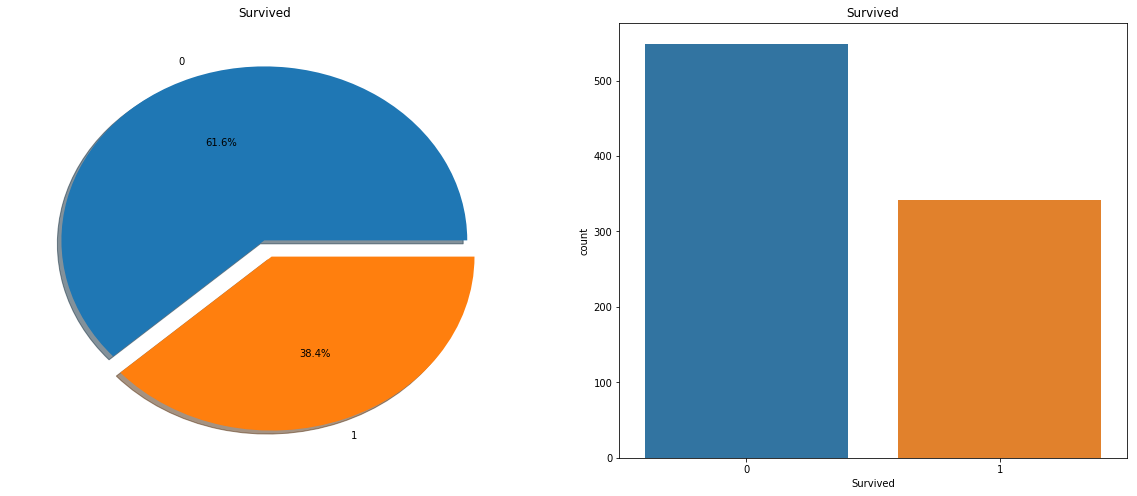

In [6]:
f,ax = plt.subplots(1, 2, figsize = (20,8))
train['Survived'].value_counts().plot.pie(explode = [0,0.1], autopct = '%1.1f%%', ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = train, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

* 1: Survived
* 0: Dead

## 2-2 Features

* Pclass
* Sex
* Age
* SibSp ( # of siblings and spouse)
* Parch ( # of parents and children)
* Fare
* Embarked
* Cabin

In [7]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

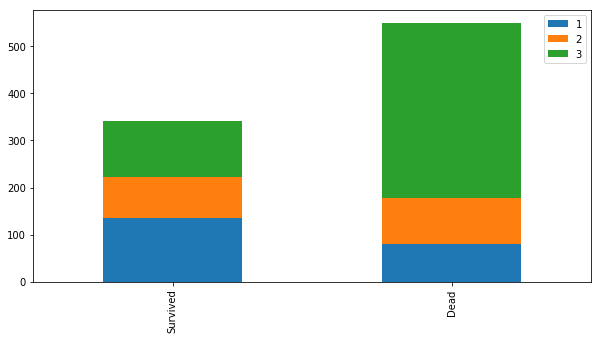

In [8]:
bar_chart('Pclass')

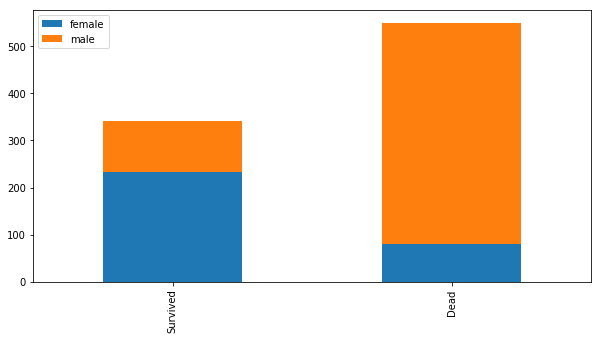

In [9]:
bar_chart('Sex')

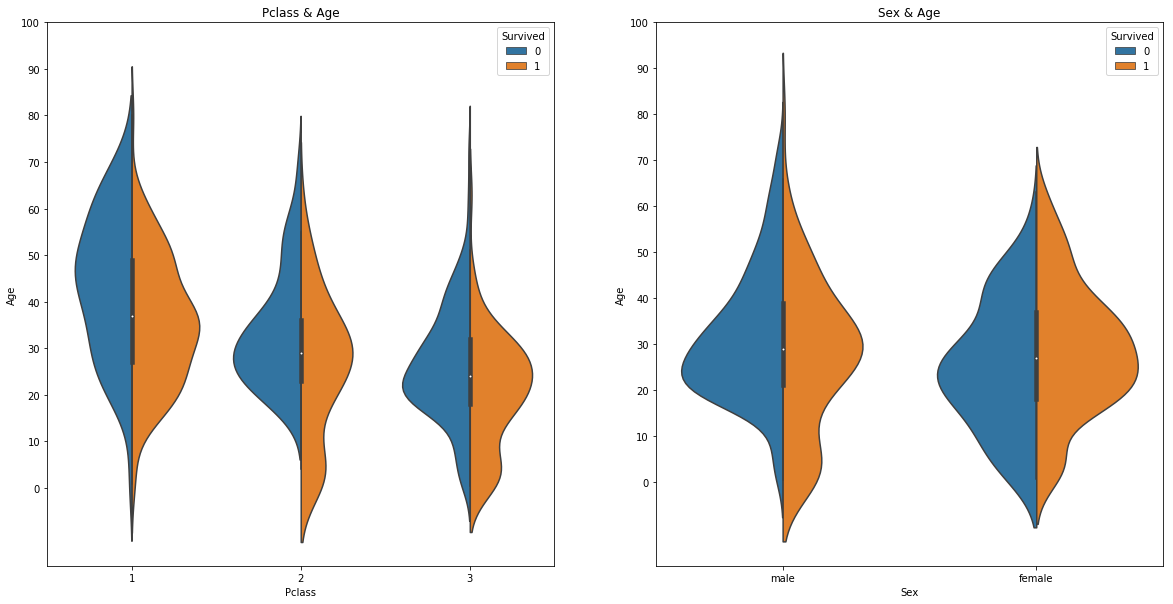

In [10]:
f,ax = plt.subplots(1, 2, figsize = (20,10))
sns.violinplot("Pclass", "Age", hue = "Survived", data = train, split = True, ax = ax[0])
ax[0].set_title('Pclass & Age')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = train, split = True, ax = ax[1])
ax[1].set_title('Sex & Age')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

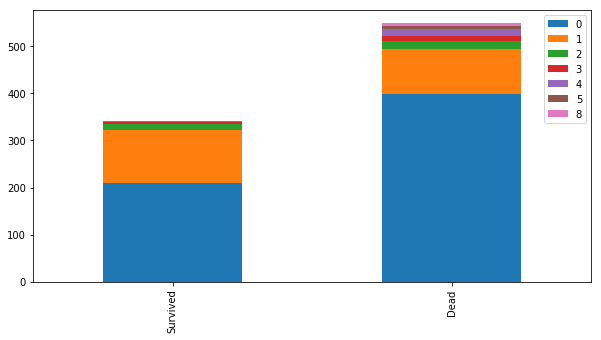

In [11]:
bar_chart('SibSp')

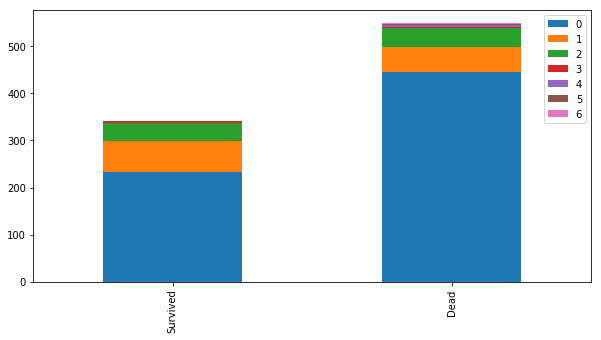

In [12]:
bar_chart('Parch')

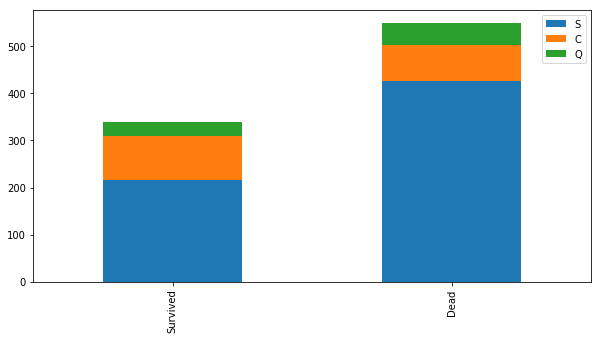

In [13]:
bar_chart('Embarked')

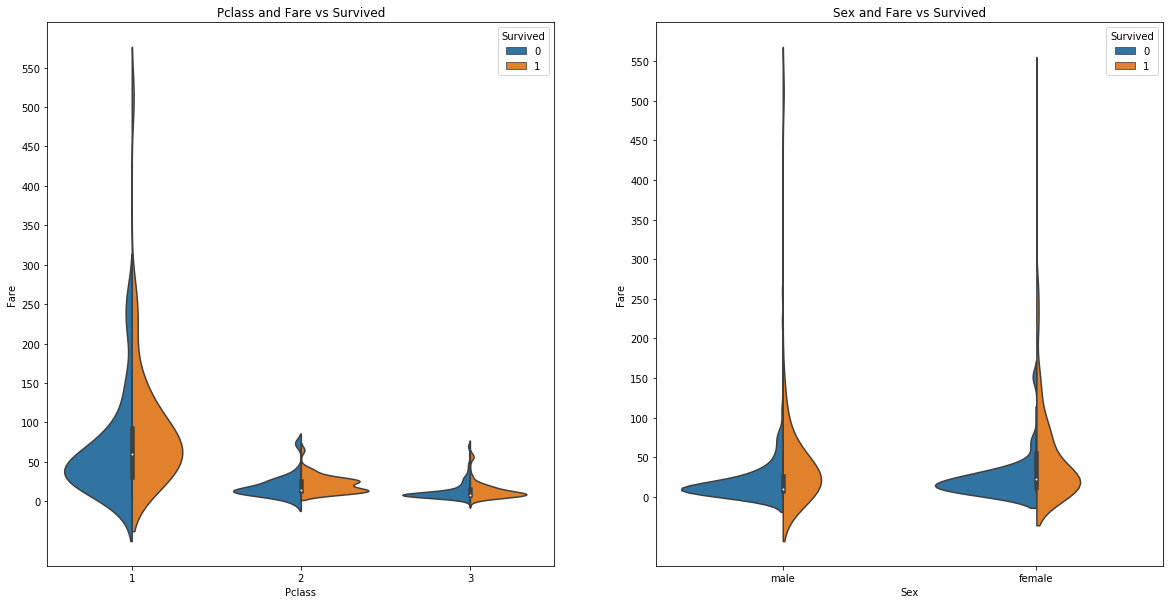

In [14]:
f,ax=plt.subplots(1, 2, figsize = (20,10))
sns.violinplot("Pclass", "Fare", hue="Survived", data = train, split = True, ax = ax[0])
ax[0].set_title('Pclass and Fare vs Survived')
ax[0].set_yticks(range(0, 600, 50))
sns.violinplot("Sex", "Fare", hue="Survived", data = train, split = True, ax = ax[1])
ax[1].set_title('Sex and Fare vs Survived')
ax[1].set_yticks(range(0, 600, 50))
plt.show()

# 3. Data Preprocessing

## 3-1. 결측치 처리

결측값이 있는 데이터를 그대로 모델링할 경우 예측과정에서 높은 정확도를 얻을 수 없다. 이 결측치를 처리하는 방법으로는 삭제와 대체가 있다. 삭제는 말 그대로 결측값이 존재하는 부분을 삭제하는 것이다. 그런데, 이렇게 결측 부분을 삭제해버리면 사용할 수 있는 데이터의 범위가 줄어든다는 단점이 있다. 다음으로는 대체가 있다. 결측값이 발생한 부분을 다른 존재하는 값을 평균이나 중간값으로 채울 수 있다. 시계열 데이터 같은 경우는 결측부분의 전후 값에 따라 결측치를 대체할 수도 있다.

### 3-1-1. 나이 결측치 처리

데이터에는 null값이 포함된 결측치가 있다. 나이의 결측치 처리는 이름의 이니셜을 따서 새로 열을 만들고 평균값으로 나이를 채워준다.

In [15]:
# Initial column 생성
train['Initial'] = 0
test['Initial'] = 0
# 정규표현식으로 이름 column의 이니셜을 Initial에 넣음
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')
    test['Initial'] = test.Name.str.extract('([A-Za-z]+)\.')

In [16]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='coolwarm')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Initial마다 Dr, Mile 등 오타를 replace를 통해 Mr, Miss로 변경한다.

In [17]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr','Mr'],inplace=True)


In [18]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [19]:
test.groupby('Initial')['Age'].mean()

Initial
Master     7.406471
Miss      21.774844
Mr        32.151351
Mrs       38.903226
Other     42.750000
Name: Age, dtype: float64

각 나이의 결측치를 이 평균을 토대로 반올림한 값으로 대체한다.

In [20]:
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age'] = 33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age'] = 46

In [21]:
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 7
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 38
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 43

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


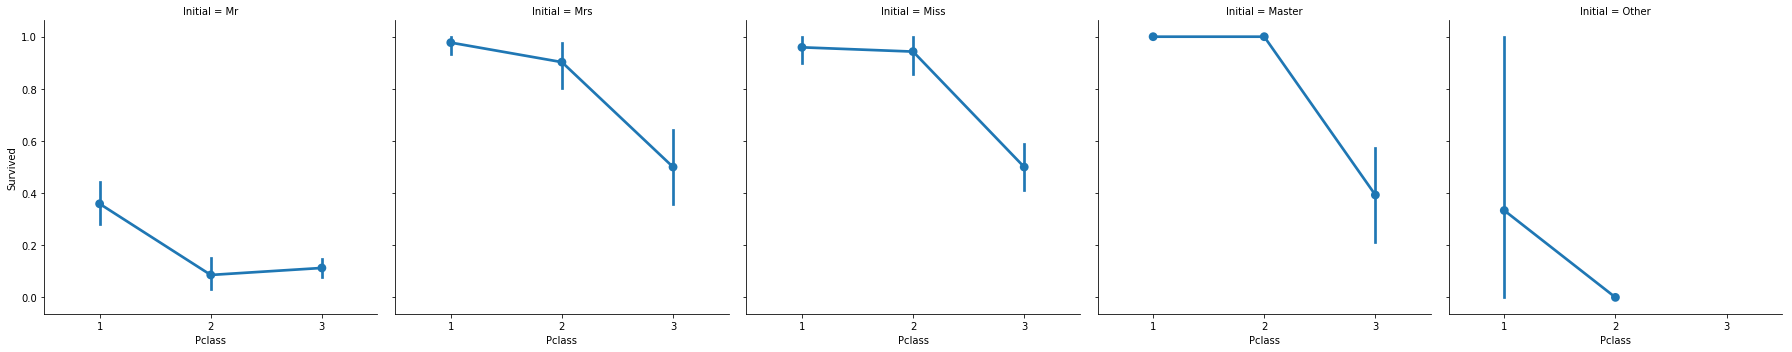

In [22]:
sns.factorplot('Pclass','Survived',col='Initial',data=train)
plt.show()

### 3-1-2. Embarked 결측치 처리

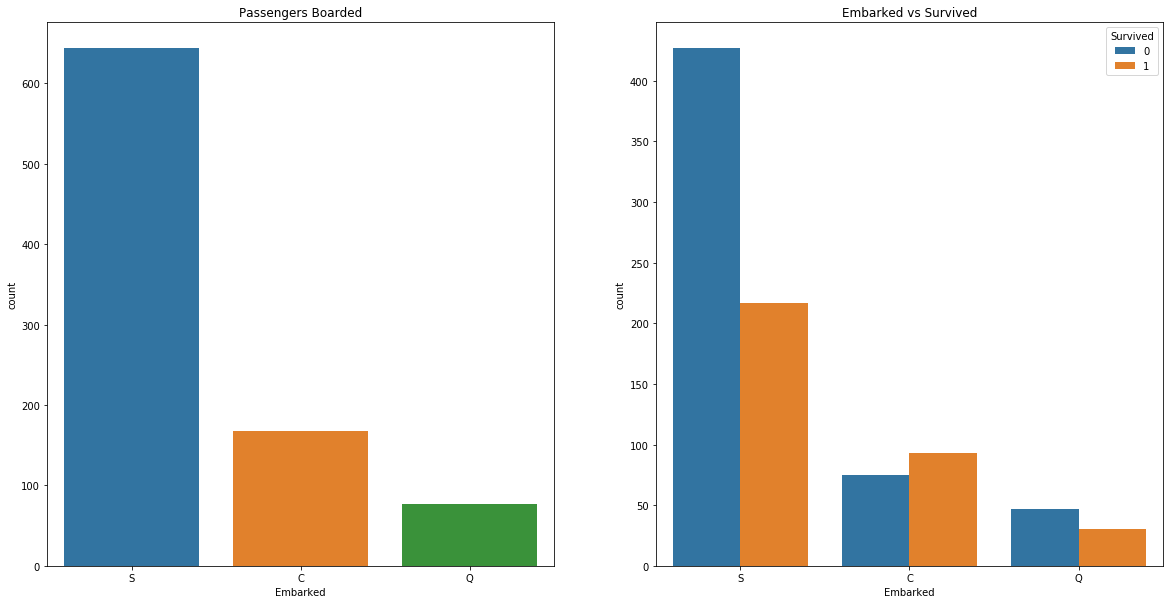

In [23]:
f,ax = plt.subplots(1, 2, figsize = (20,10))
sns.countplot('Embarked', data = train, ax = ax[0])
ax[0].set_title('Passengers Boarded')
sns.countplot('Embarked', hue = 'Survived', data = train, ax = ax[1])
ax[1].set_title('Embarked vs Survived')
plt.subplots_adjust(wspace = 0.2,hspace = 0.5)
plt.show()

Embarked의 결측치는 2개 밖에 없으며, 탑승객이 가장 많은 S로 Embarked의 결측치를 채운다.

In [24]:
train['Embarked'].fillna('S',inplace=True)
test['Embarked'].fillna('S',inplace=True)


Cabin은 결측치가 대부분이기 때문에, Cabin은 활용 및 전처리를 하지 않는다.

## 3-2. Feature engineering

feature engineering이란 기존 변수를 이용해 데이터 정보를 추가하는 과정이다.
새로운 데이터나 변수의 추가 없이 기존 데이터를 다루는 것이다. 그 방법으로는
scaling, binning, transform, dummy가 있다.
1) scaling
변수 단위 변경이나, 변수 분포가 편향된 경우, 변수 간 관계가 모호한 경우에 사용한다.
주로 log 함수나 square root 등을 통해 scaling을 한다.

2) binning
연속형 변수를 범주형 변수로 만드는 과정이다. 사실 이 부분은 데이터 분석가가
객관성을 가지고 binning을 하는 것이 중요하다.

3) dummy
binning과 반대로 범주형 변수를 연속형 변수로 만드는 과정이다.

여기서는 성별에 대한 dummy(mapping), 나이에 대한 binning을 한다.

우선 heatmap으로 데이터의 상관관계를 확인하다.

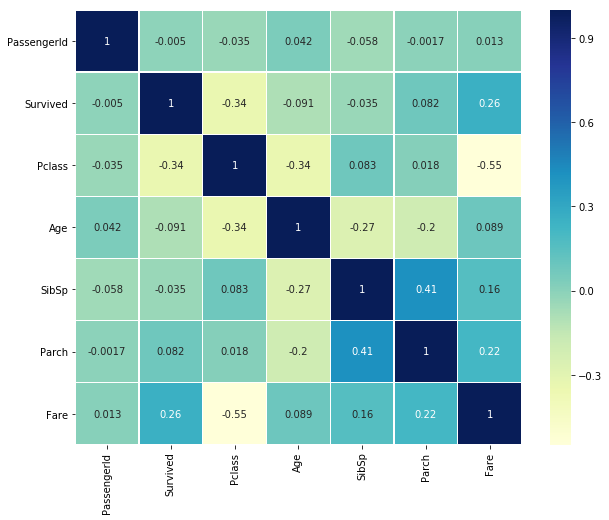

In [25]:
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu',linewidths = 0.2)
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

변수 간 상관관계를 확인한 결과 생존에는 높은 요금을 낸 탑승객이 비교적 생존 확률이 높음을 확인할 수 있다. 탑승객 중 SibSp와 Parch는 0.41의 상관관계를 보인다. 아무튼, 이러한 방식으로 데이터의 상관관계를 파악할 수 있다.

### 3-2-1. Age binning
나이를 15세 이하, 30세 이하, 50세 이하, 65세 이하, 그 이상으로 구분한다.

In [26]:
train['age_bin'] = 0
train.loc[train['Age'] <= 15, 'age_bin'] = 0
train.loc[(train['Age'] > 15) & (train['Age'] <= 30),'age_bin'] = 1
train.loc[(train['Age'] > 30) & (train['Age'] <= 50),'age_bin'] = 2
train.loc[(train['Age'] > 50) & (train['Age'] <= 65),'age_bin'] = 3
train.loc[train['Age'] > 65,'age_bin'] = 4

In [27]:
test['age_bin'] = 0
test.loc[test['Age'] <= 15, 'age_bin'] = 0
test.loc[(test['Age'] > 15) & (test['Age'] <= 30),'age_bin'] = 1
test.loc[(test['Age'] > 30) & (test['Age'] <= 50),'age_bin'] = 2
test.loc[(test['Age'] > 50) & (test['Age'] <= 65),'age_bin'] = 3
test.loc[test['Age'] > 65,'age_bin'] = 4

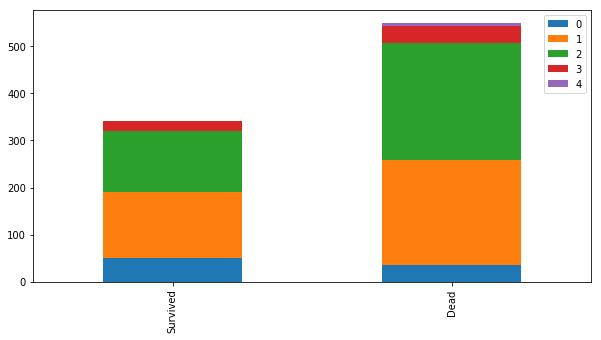

In [28]:
bar_chart('age_bin')

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


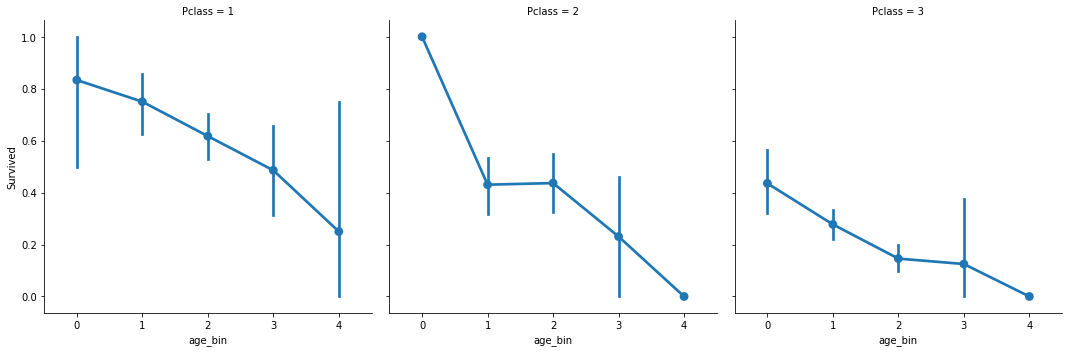

In [29]:
sns.factorplot('age_bin', 'Survived', data = train, col = 'Pclass')
plt.show()

전반적으로 젊은 나이일수록 생존율이 높게 나타남을 확인할 수 있다.

### 3-2-2. Fare binning
탑승 요금도 마찬가지로 Age와 동일한 방식으로 4개의 구간으로 binning한다.

In [30]:
train['fare_range'] = pd.qcut(train['Fare'],4)
train.groupby(['fare_range'])['Survived'].mean().to_frame().style.background_gradient(cmap='coolwarm')

,Survived
fare_range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


출력값과 같이 높은 요금을 낸 탑승객일수록 생존율이 높음을 확인할 수 있다.

In [31]:
train['fare_bin'] = 0
train.loc[train['Fare'] <= 7.91, 'fare_bin'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454),'fare_bin'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31),'fare_bin'] = 2
train.loc[(train['Fare'] > 31) & (train['Fare'] <= 512.329),'fare_bin'] = 3

### 3-2-3. 동승객 feature enginnering
Parch와 Sibsp를 더한 같이 탑승한 전체 가족 수를 구해서 혼자 탑승한 승객은 Alone으로 표시해서 생존율을 비교한다.

C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


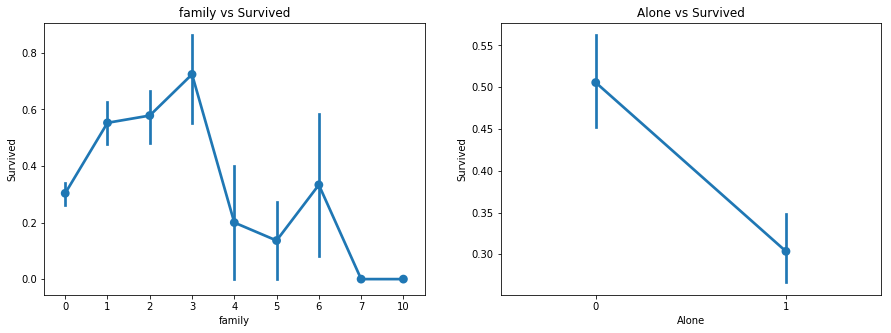

In [32]:
train['family'] = 0
train['family'] = train['Parch'] + train['SibSp']
train['Alone'] = 0
train.loc[train.family==0,'Alone'] = 1

f,ax = plt.subplots(1, 2, figsize = (15,5))
sns.factorplot('family','Survived',data = train,ax = ax[0])
ax[0].set_title('family vs Survived')
sns.factorplot('Alone','Survived',data = train, ax = ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [33]:
test['family'] = 0
test['family'] = test['Parch'] + test['SibSp']
test['Alone'] = 0
test.loc[test.family==0,'Alone'] = 1

혼자 탑승한 승객은 Alone에 1로 표시했다. 그래프를 확인한 결과, 함께 탑승한 가족이 3명일 경우 가장 높은 생존율이 나타났으며, 혼자 탑승한 승객의 생존율은 낮음을 확인할 수 있다.

### 3-2-4. dummy(mapping)
성별, 탑승 위치, 이니셜을 mapping한다.

In [34]:
train['Sex'].replace(['male', 'female'],[0, 1],inplace = True)
train['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace = True)
train['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0, 1, 2, 3, 4],inplace = True)

In [35]:
test['Sex'].replace(['male', 'female'],[0, 1],inplace = True)
test['Embarked'].replace(['S', 'C', 'Q'],[0, 1, 2],inplace = True)
test['Initial'].replace(['Mr', 'Mrs', 'Miss', 'Master', 'Other'],[0, 1, 2, 3, 4],inplace = True)

## 3-3. 데이터 삭제
이제 사용하지 않을 데이터는 삭제한다. name, age, fare, cabin, fare_range, fare_bin, passengerid column을 삭제한다.

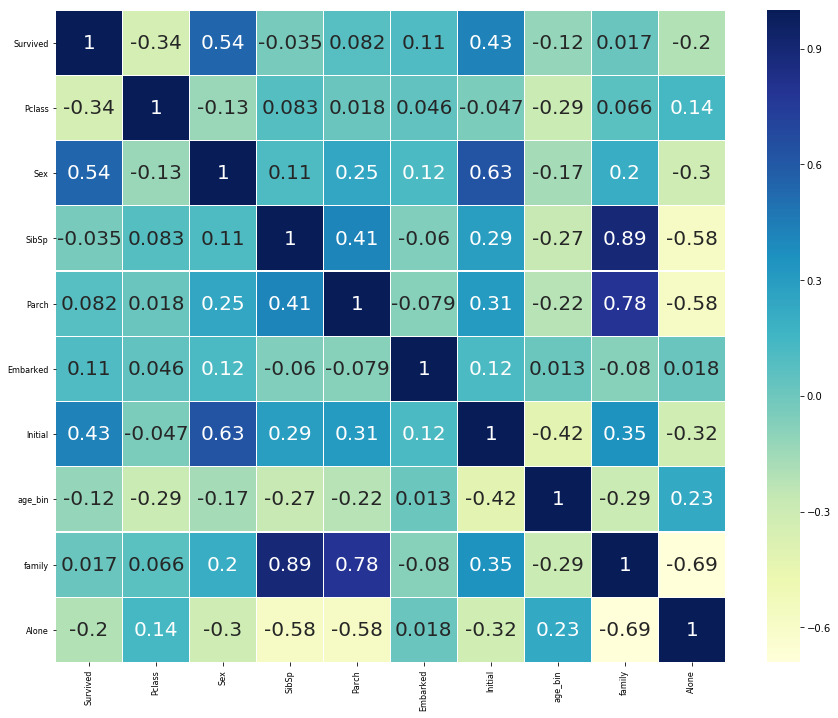

In [36]:
train.drop(['Name','Age','Ticket','Fare','Cabin','fare_range','fare_bin', 'PassengerId'], axis = 1, inplace = True)
sns.heatmap(train.corr(), annot = True, cmap = 'YlGnBu',linewidths = 0.1, annot_kws = {'size':20})
fig = plt.gcf()
fig.set_size_inches(15,12)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.show()

In [37]:
test.drop(['Name','Age','Ticket','Fare','Cabin'], axis = 1, inplace = True)

이제 어느 정도 데이터 정리가 완료되었다. 이후 머신러닝 모델을 사용하여 test 데이터에 담긴 탑승객의 생존율을 예측한다.

# 4. Modeling

In [38]:
import numpy as np

#머신러닝 패키지 Import
from sklearn.linear_model import LogisticRegression #로지스틱 회귀
from sklearn.tree import DecisionTreeClassifier #의사결정 나무
from sklearn.svm import SVC #SVM
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
from sklearn.neighbors import KNeighborsClassifier #K-NN
from sklearn.naive_bayes import GaussianNB #나이브 베이즈

# 교차검증
from sklearn.model_selection import KFold
k_fold = KFold(n_splits=10, shuffle=False, random_state =0)

# 정확도 측정
from sklearn.model_selection import cross_val_score

In [39]:
learning = train['Survived']
train = train.drop('Survived',axis =1)
scoring = 'accuracy'

In [40]:
model = LogisticRegression()
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

80.14

In [41]:
model = DecisionTreeClassifier()
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

80.7

In [42]:
model = SVC()
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

82.83

In [43]:
model = RandomForestClassifier(n_estimators = 13)
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

81.71

In [44]:
model = KNeighborsClassifier(n_neighbors = 13)
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

81.37

In [45]:
model = GaussianNB()
score = cross_val_score(model, train, learning, cv = k_fold, n_jobs = 1, scoring = scoring)
round(np.mean(score)*100, 2)

80.7

# 5. Testing
테스트 모델은 가장 정확도가 높게 나온 SVM으로 실행한다.

In [46]:
test_model = SVC()
test_model.fit(train, learning)

testing = test.drop("PassengerId", axis=1).copy()
prediction = test_model.predict(testing)

In [47]:
result = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

In [48]:
result.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


test.csv의 생존 예측을 result로 확인할 수 있다.